### Name: Kucharlapati Venkata Suneel Raju

# **Username: suneelraju160**

Assignment:
Data Science latest assignments - 16 Aug 2025

Assignment 7 of 20: **MLR**

Date: 20 Dec 2025

## Load Dataset


In [1]:
import pandas as pd

df = pd.read_csv('/content/ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


## Exploratory Data Analysis and Preprocessing

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None


In [3]:
print(df.describe())

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

In [4]:
print(df.isnull().sum())

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


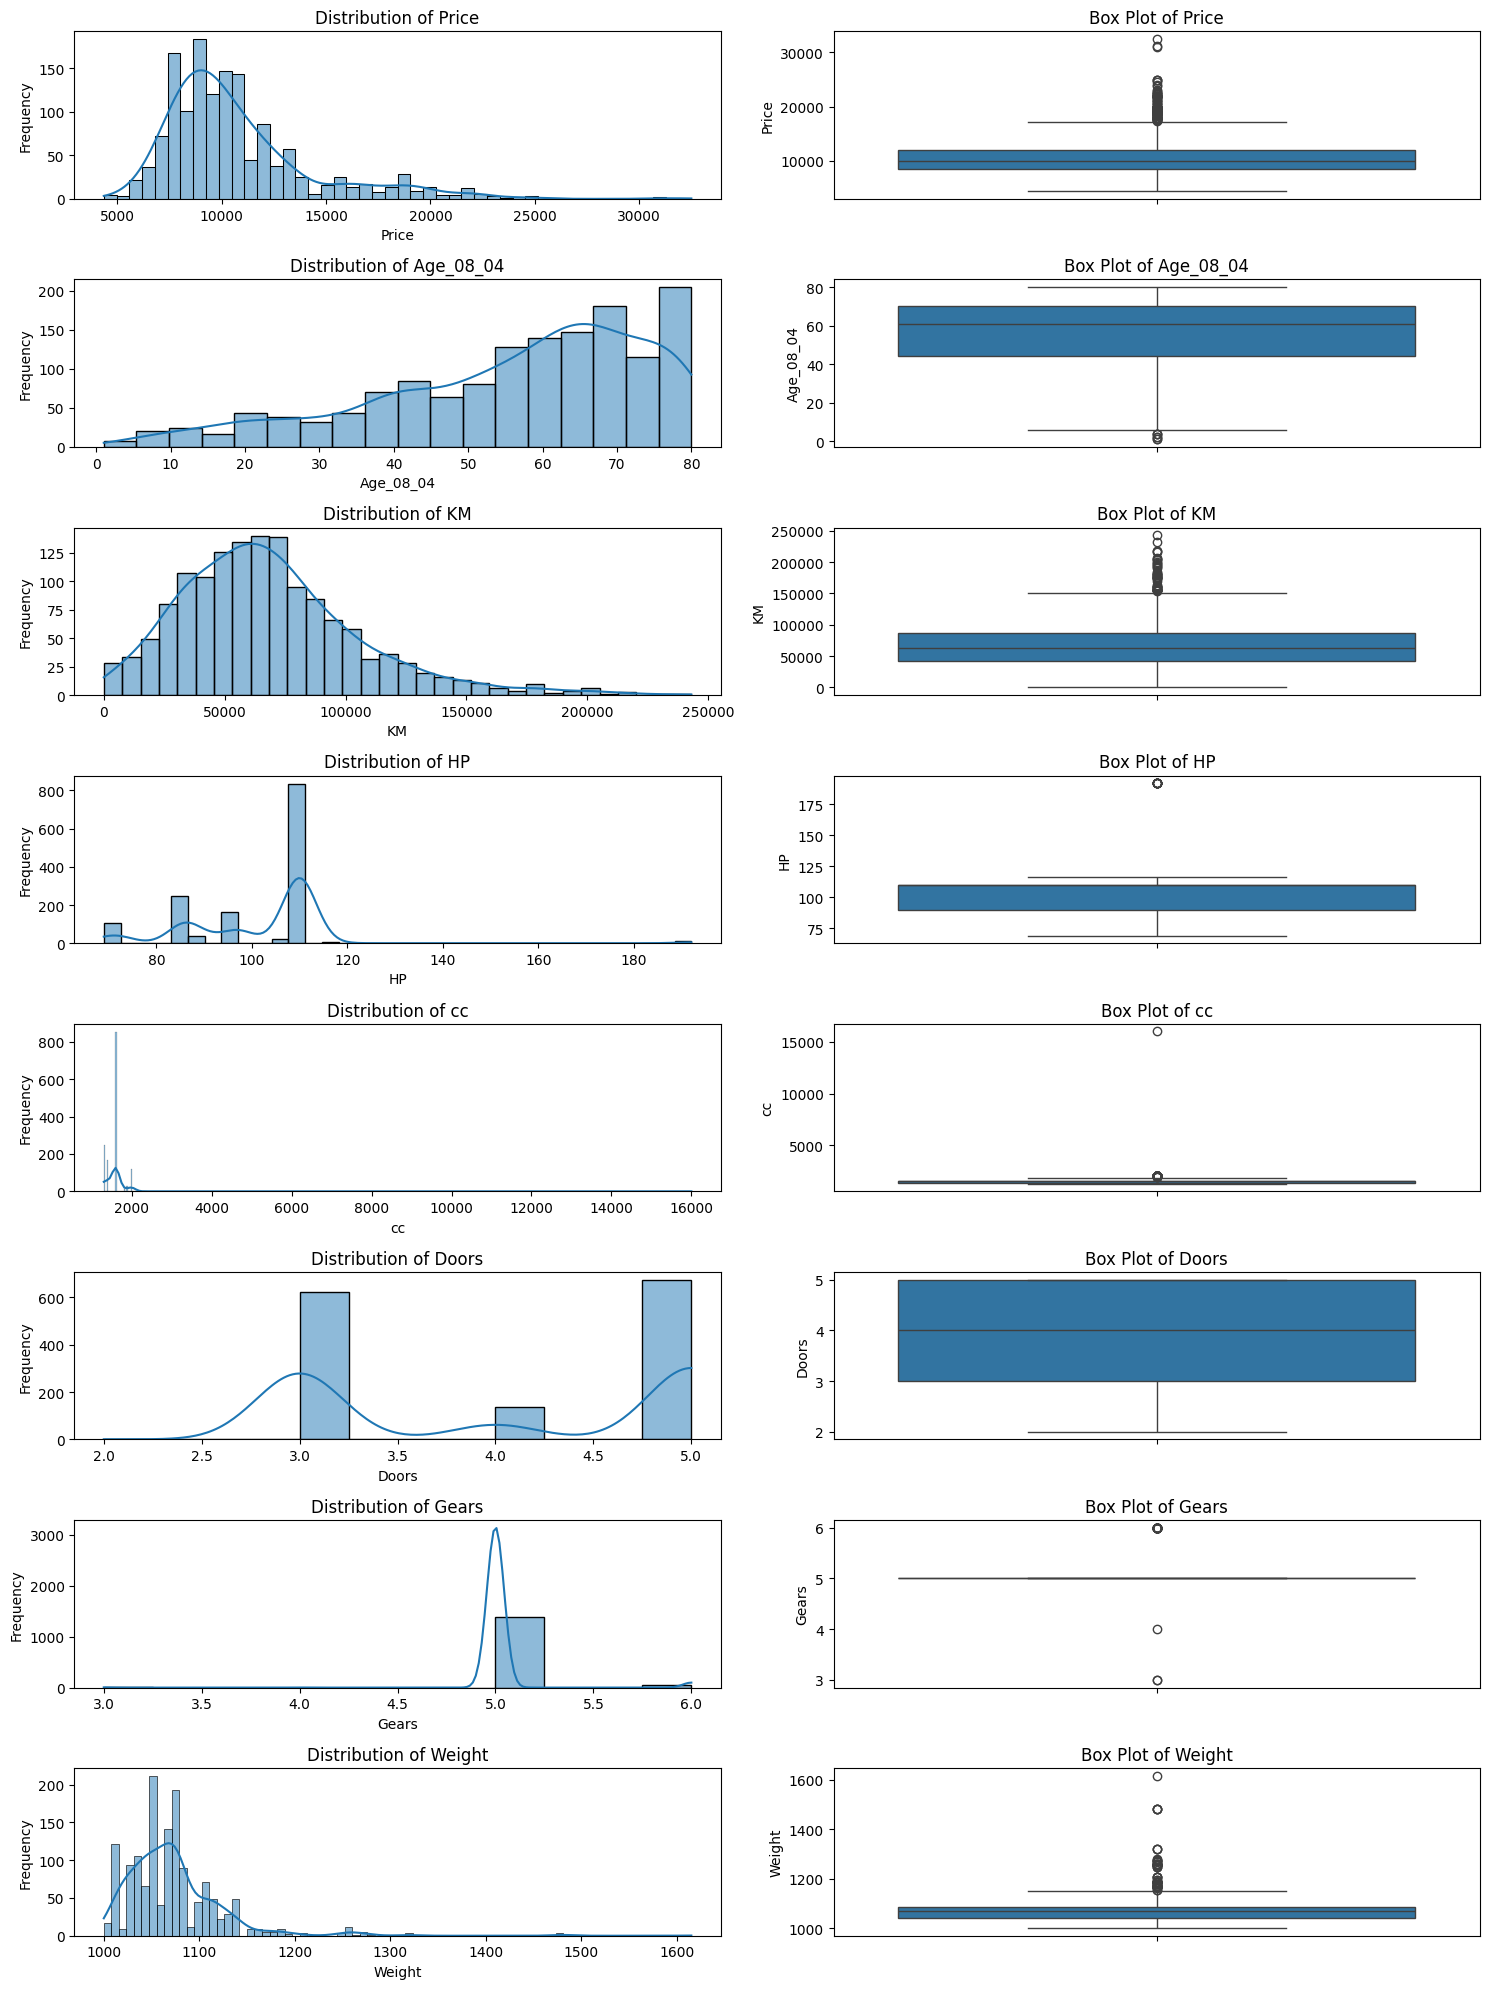

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns (excluding 'Cylinders' and 'Automatic' which are quasi-categorical/binary)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Remove 'Cylinders' and 'Automatic' if they are present and should not be treated as continuous numerical for these plots
numerical_cols = [col for col in numerical_cols if col not in ['Cylinders', 'Automatic']]

# Set up the figure size for better readability
plt.figure(figsize=(15, 20))

for i, col in enumerate(numerical_cols):
    # Histogram
    plt.subplot(len(numerical_cols), 2, 2 * i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box plot
    plt.subplot(len(numerical_cols), 2, 2 * i + 2)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

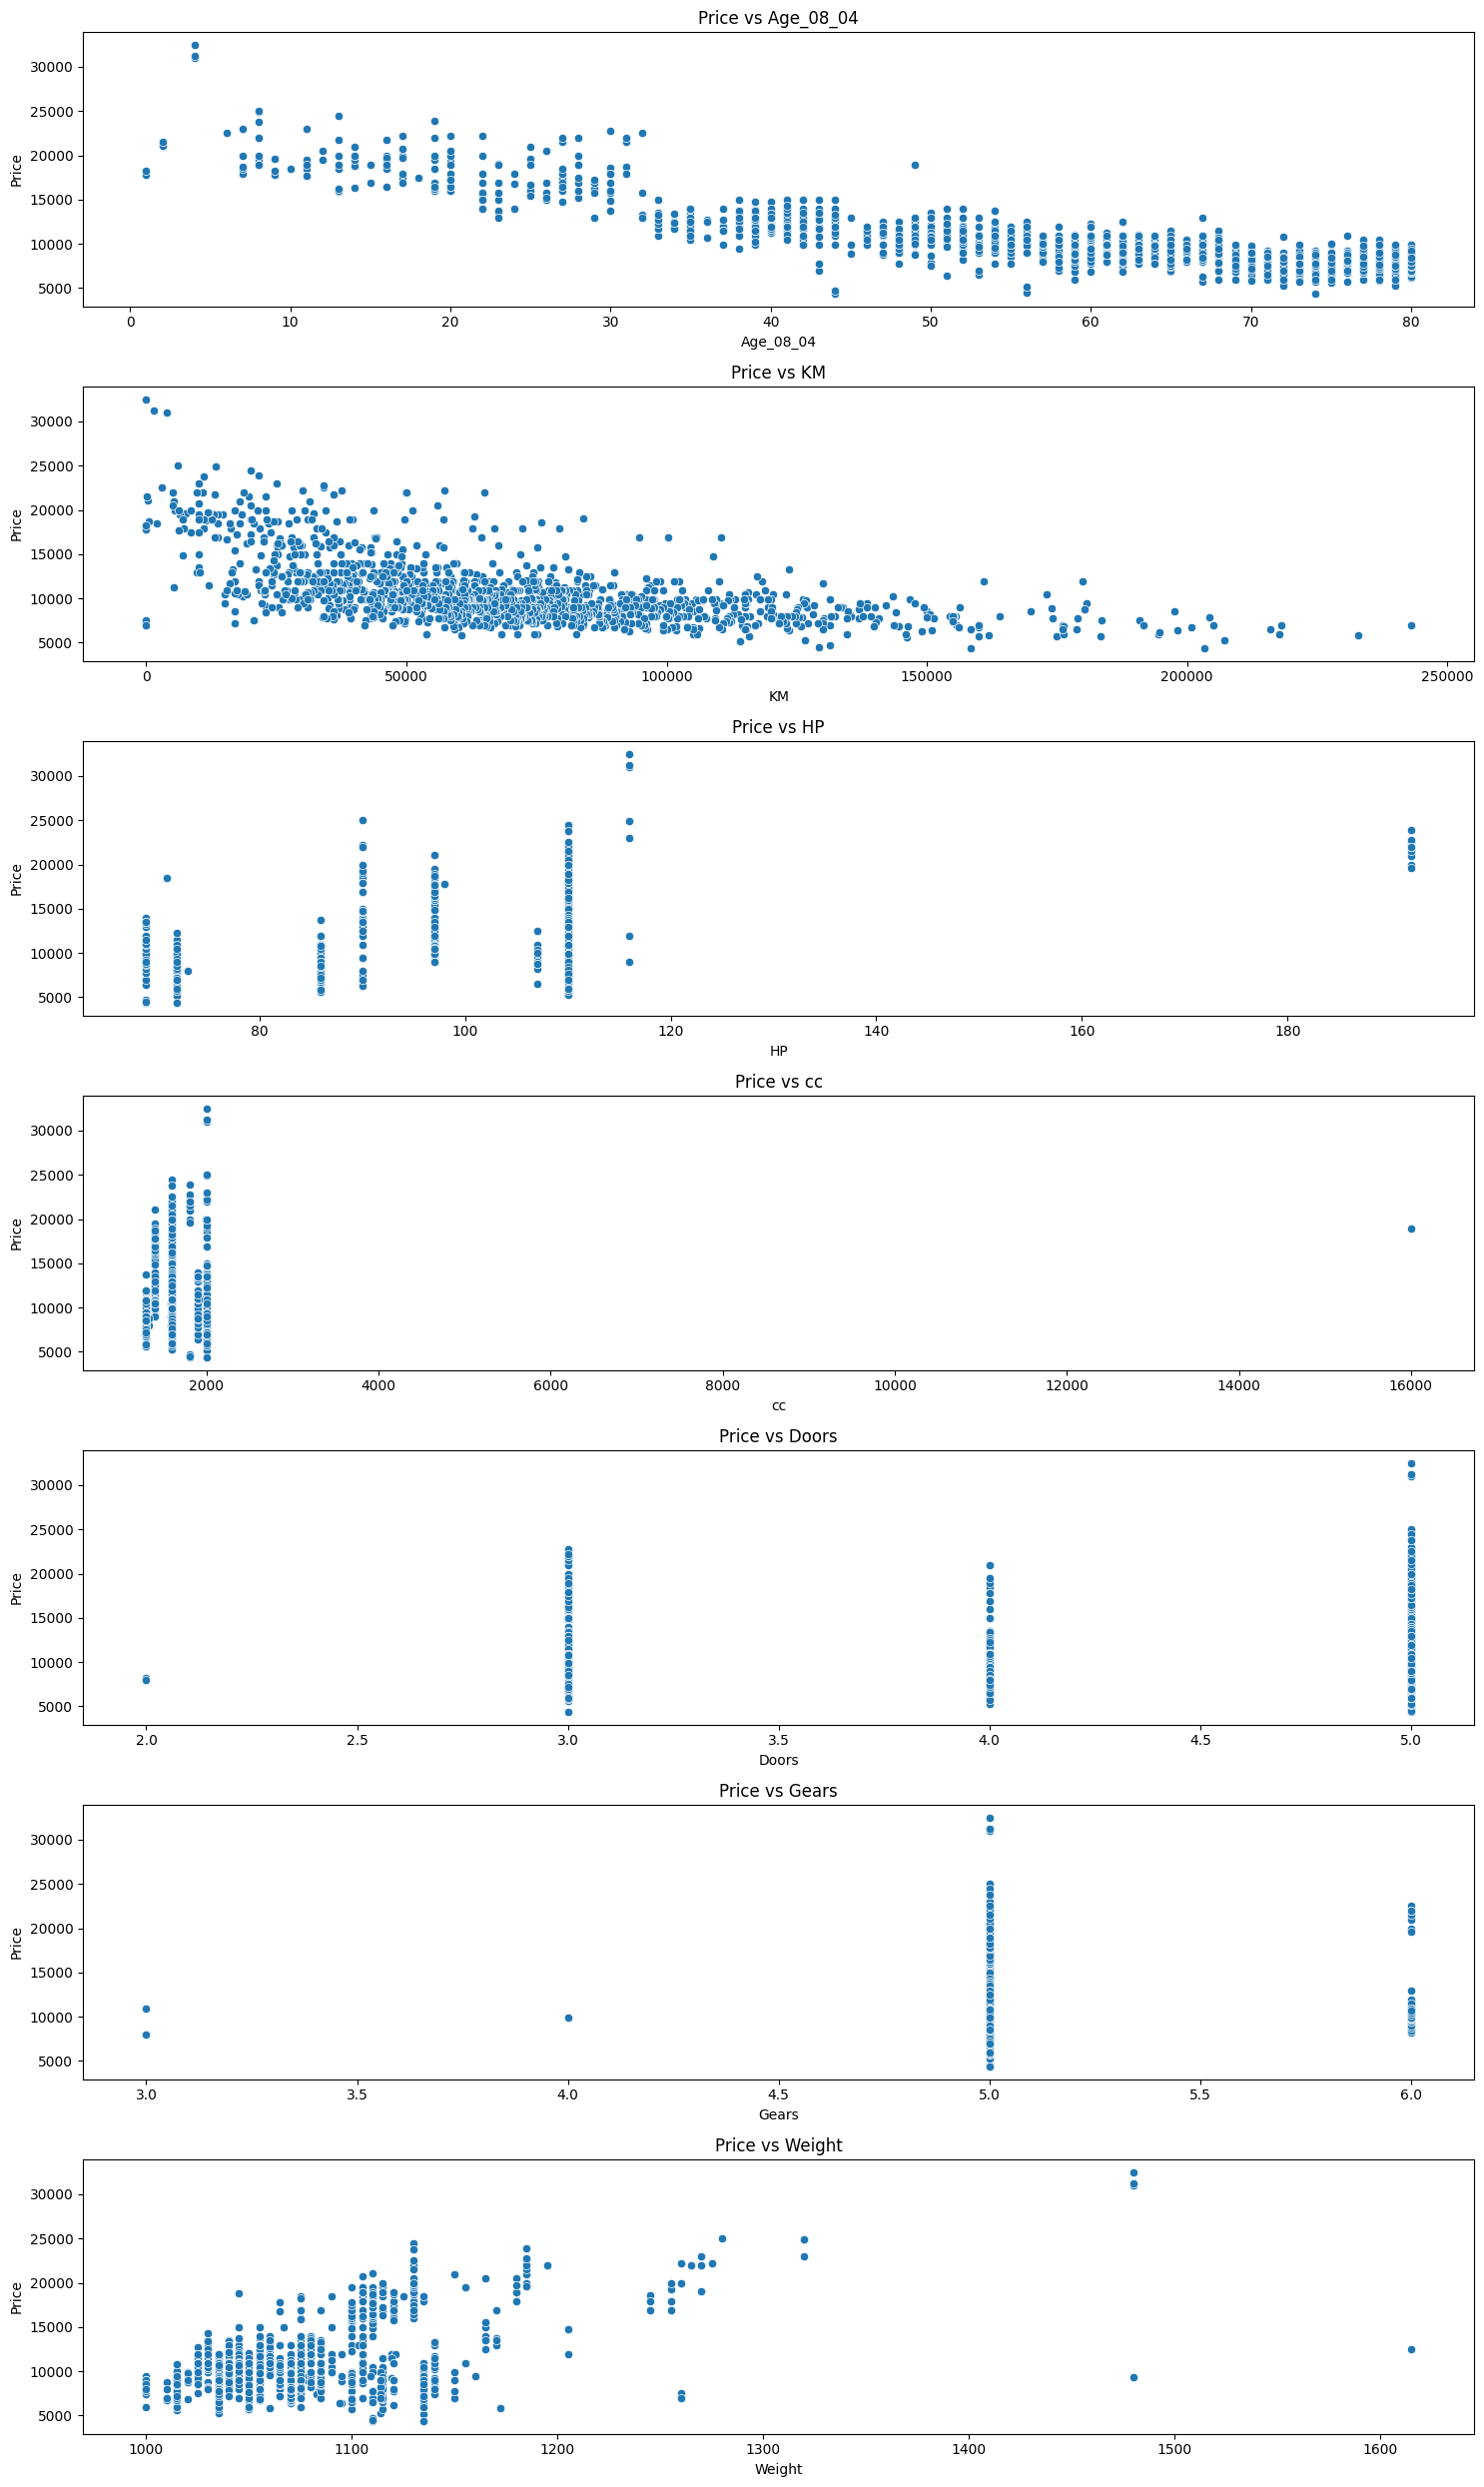

In [6]:
plt.figure(figsize=(15, 25))

# Ensure 'Price' is included for plotting if it's the target, but not plotted against itself
plot_numerical_cols = [col for col in numerical_cols if col != 'Price']

for i, col in enumerate(plot_numerical_cols):
    plt.subplot(len(plot_numerical_cols), 1, i + 1)
    sns.scatterplot(x=df[col], y=df['Price'])
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

In [16]:
print("Original Fuel_Type unique values and their counts:")
print(df['Fuel_Type'].value_counts())

# Apply one-hot encoding to 'Fuel_Type' column
df_encoded = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

print("\nDataFrame after one-hot encoding (first 5 rows):")
print(df_encoded.head())

Original Fuel_Type unique values and their counts:
Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

DataFrame after one-hot encoding (first 5 rows):
   Price  Age_08_04     KM  HP  Automatic    cc  Doors  Cylinders  Gears  \
0  13500         23  46986  90          0  2000      3          4      5   
1  13750         23  72937  90          0  2000      3          4      5   
2  13950         24  41711  90          0  2000      3          4      5   
3  14950         26  48000  90          0  2000      3          4      5   
4  13750         30  38500  90          0  2000      3          4      5   

   Weight  Fuel_Type_Diesel  Fuel_Type_Petrol  
0    1165              True             False  
1    1165              True             False  
2    1165              True             False  
3    1165              True             False  
4    1170              True             False  


## Split Data

In [8]:
from sklearn.model_selection import train_test_split

# Separate target variable (y) and features (X)
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1148, 11)
X_test shape: (288, 11)
y_train shape: (1148,)
y_test shape: (288,)


## Multiple Linear Regression Models

In [9]:
from sklearn.linear_model import LinearRegression

# Initialize and train the first Multiple Linear Regression model
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

# Print the intercept
print(f"Model 1 Intercept: {model_1.intercept_:.2f}\n")

# Print the coefficients and their corresponding feature names
print("Model 1 Coefficients:")
for feature, coef in zip(X_train.columns, model_1.coef_):
    print(f"  {feature}: {coef:.2f}")

Model 1 Intercept: -14255.39

Model 1 Coefficients:
  Age_08_04: -120.83
  KM: -0.02
  HP: 14.04
  Automatic: 148.83
  cc: -0.03
  Doors: -60.31
  Cylinders: -0.00
  Gears: 551.60
  Weight: 25.88
  Fuel_Type_Diesel: -68.55
  Fuel_Type_Petrol: 1370.81


In [10]:
selected_features_2 = ['Age_08_04', 'KM', 'HP', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']
X_train_2 = X_train[selected_features_2]
X_test_2 = X_test[selected_features_2]

# Initialize and train the second Multiple Linear Regression model with selected features
model_2 = LinearRegression()
model_2.fit(X_train_2, y_train)

# Print the intercept
print(f"Model 2 Intercept: {model_2.intercept_:.2f}\n")

# Print the coefficients and their corresponding feature names
print("Model 2 Coefficients:")
for feature, coef in zip(X_train_2.columns, model_2.coef_):
    print(f"  {feature}: {coef:.2f}")

Model 2 Intercept: -11382.20

Model 2 Coefficients:
  Age_08_04: -120.67
  KM: -0.02
  HP: 16.26
  Weight: 25.26
  Fuel_Type_Diesel: 54.19
  Fuel_Type_Petrol: 1419.66


In [11]:
selected_features_3 = ['Age_08_04', 'KM', 'HP', 'Weight', 'Gears', 'Doors', 'cc']
X_train_3 = X_train[selected_features_3]
X_test_3 = X_test[selected_features_3]

# Initialize and train the third Multiple Linear Regression model with selected features
model_3 = LinearRegression()
model_3.fit(X_train_3, y_train)

# Print the intercept
print(f"Model 3 Intercept: {model_3.intercept_:.2f}\n")

# Print the coefficients and their corresponding feature names
print("Model 3 Coefficients:")
for feature, coef in zip(X_train_3.columns, model_3.coef_):
    print(f"  {feature}: {coef:.2f}")

Model 3 Intercept: -8223.97

Model 3 Coefficients:
  Age_08_04: -119.88
  KM: -0.02
  HP: 27.43
  Weight: 20.10
  Gears: 573.38
  Doors: 1.67
  cc: -0.10


## Evaluate Models


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# --- Evaluate Model 1 ---
print("\n--- Evaluating Model 1 (All Features) ---")
y_pred_1 = model_1.predict(X_test)

r2_1 = r2_score(y_test, y_pred_1)
mse_1 = mean_squared_error(y_test, y_pred_1)
rmse_1 = np.sqrt(mse_1)
mae_1 = mean_absolute_error(y_test, y_pred_1)

print(f"R-squared: {r2_1:.4f}")
print(f"Mean Squared Error (MSE): {mse_1:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_1:.2f}")
print(f"Mean Absolute Error (MAE): {mae_1:.2f}")

# --- Evaluate Model 2 ---
print("\n--- Evaluating Model 2 (Selected Features: Age, KM, HP, Weight, Fuel Type) ---")
y_pred_2 = model_2.predict(X_test_2)

r2_2 = r2_score(y_test, y_pred_2)
mse_2 = mean_squared_error(y_test, y_pred_2)
rmse_2 = np.sqrt(mse_2)
mae_2 = mean_absolute_error(y_test, y_pred_2)

print(f"R-squared: {r2_2:.4f}")
print(f"Mean Squared Error (MSE): {mse_2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_2:.2f}")
print(f"Mean Absolute Error (MAE): {mae_2:.2f}")

# --- Evaluate Model 3 ---
print("\n--- Evaluating Model 3 (Selected Features: Age, KM, HP, Weight, Gears, Doors, cc) ---")
y_pred_3 = model_3.predict(X_test_3)

r2_3 = r2_score(y_test, y_pred_3)
mse_3 = mean_squared_error(y_test, y_pred_3)
rmse_3 = np.sqrt(mse_3)
mae_3 = mean_absolute_error(y_test, y_pred_3)

print(f"R-squared: {r2_3:.4f}")
print(f"Mean Squared Error (MSE): {mse_3:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_3:.2f}")
print(f"Mean Absolute Error (MAE): {mae_3:.2f}")


--- Evaluating Model 1 (All Features) ---
R-squared: 0.8349
Mean Squared Error (MSE): 2203043.82
Root Mean Squared Error (RMSE): 1484.27
Mean Absolute Error (MAE): 990.89

--- Evaluating Model 2 (Selected Features: Age, KM, HP, Weight, Fuel Type) ---
R-squared: 0.8339
Mean Squared Error (MSE): 2216120.64
Root Mean Squared Error (RMSE): 1488.66
Mean Absolute Error (MAE): 1001.28

--- Evaluating Model 3 (Selected Features: Age, KM, HP, Weight, Gears, Doors, cc) ---
R-squared: 0.8517
Mean Squared Error (MSE): 1978740.47
Root Mean Squared Error (RMSE): 1406.68
Mean Absolute Error (MAE): 995.99


## Lasso and Ridge Regression

In [13]:
from sklearn.linear_model import Lasso, Ridge

# --- Lasso Regression Model ---
print("\n--- Lasso Regression Model ---")

# Initialize and train Lasso model
# Using a default alpha of 0.1 as suggested, or can be tuned
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate Lasso model
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print(f"R-squared (Lasso): {r2_lasso:.4f}")
print(f"Mean Squared Error (MSE) (Lasso): {mse_lasso:.2f}")
print(f"Root Mean Squared Error (RMSE) (Lasso): {rmse_lasso:.2f}")
print(f"Mean Absolute Error (MAE) (Lasso): {mae_lasso:.2f}")

# --- Ridge Regression Model ---
print("\n--- Ridge Regression Model ---")

# Initialize and train Ridge model
# Using a default alpha of 1.0 as suggested, or can be tuned
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate Ridge model
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f"R-squared (Ridge): {r2_ridge:.4f}")
print(f"Mean Squared Error (MSE) (Ridge): {mse_ridge:.2f}")
print(f"Root Mean Squared Error (RMSE) (Ridge): {rmse_ridge:.2f}")
print(f"Mean Absolute Error (MAE) (Ridge): {mae_ridge:.2f}")


--- Lasso Regression Model ---
R-squared (Lasso): 0.8349
Mean Squared Error (MSE) (Lasso): 2202270.26
Root Mean Squared Error (RMSE) (Lasso): 1484.00
Mean Absolute Error (MAE) (Lasso): 990.89

--- Ridge Regression Model ---
R-squared (Ridge): 0.8351
Mean Squared Error (MSE) (Ridge): 2199746.37
Root Mean Squared Error (RMSE) (Ridge): 1483.15
Mean Absolute Error (MAE) (Ridge): 990.73


## Summary:

### Q&A
*   **What are the insights from EDA?**
    The dataset contains 1436 entries with no missing values. The 'Cylinders' column was constant (all cars had 4 cylinders), rendering it less useful as a predictive feature on its own. Visualizations revealed that car `Age_08_04` has a strong inverse relationship with 'Price', while `HP` and `Weight` show positive relationships. The 'Fuel_Type' categorical feature was successfully one-hot encoded for modeling.

*   **How do the different models (Multiple Linear Regression, Lasso, and Ridge) compare in performance?**
    Among the Multiple Linear Regression (MLR) models, **Model 3** (using `Age_08_04`, `KM`, `HP`, `Weight`, `Gears`, `Doors`, `cc`) performed the best with an R-squared of 0.8517, Root Mean Squared Error (RMSE) of \$1406.68, and Mean Absolute Error (MAE) of \$995.99.
    The Lasso and Ridge regression models, applied with default `alpha` values to all features, performed comparably to MLR Model 1 (all features). Ridge regression showed slightly better performance than Lasso, with an R-squared of 0.8351 and RMSE of \$1483.15, while Lasso had an R-squared of 0.8349 and RMSE of \$1484.00. Overall, Model 3 (MLR with a specific feature subset) demonstrated the highest predictive accuracy.

*   **What are the key factors influencing Toyota Corolla prices?**
    The analysis indicates that the `Age_08_04` of the car is the most significant negative predictor, meaning older cars are substantially cheaper. Positive factors influencing price include `Weight`, `HP`, and `Gears`. `Fuel_Type_Petrol` also had a positive impact on price compared to the baseline `CNG` fuel type.

### Data Analysis Key Findings
*   The dataset, comprising 1436 entries and 11 features, was found to be complete with no missing values.
*   The target variable, 'Price', ranges from \$4350 to \$32500, with an average price of \$10730.82.
*   Exploratory Data Analysis revealed a strong inverse relationship between car `Age_08_04` and `Price` and positive relationships between `HP`, `Weight`, and `Price`.
*   The `Fuel_Type` categorical variable was one-hot encoded, creating `Fuel_Type_Diesel` and `Fuel_Type_Petrol` features.
*   Three Multiple Linear Regression models were built:
    *   **Model 1 (All Features):** Achieved an R-squared of 0.8349 and an RMSE of \$1484.27. Key coefficients included `Age_08_04` (-\$120.83), `Weight` (\$25.88), `Gears` (\$551.60), and `Fuel_Type_Petrol` (\$1370.81).
    *   **Model 3 (Selected Features: Age, KM, HP, Weight, Gears, Doors, cc):** Demonstrated the highest performance among all models, with an R-squared of 0.8517, RMSE of \$1406.68, and MAE of \$995.99.
*   Lasso Regression (alpha=0.1) yielded an R-squared of 0.8349 and RMSE of \$1484.00.
*   Ridge Regression (alpha=1.0) performed slightly better than Lasso, with an R-squared of 0.8351 and RMSE of \$1483.15.

### Insights or Next Steps
*   **Insight:** The age of the car is the predominant factor negatively influencing Toyota Corolla prices, while attributes like weight, horsepower, and number of gears contribute positively. This suggests a strong depreciation effect and value placed on performance/robustness.
*   **Next Steps:** Further hyperparameter tuning for Lasso and Ridge regression models could be explored to potentially improve their performance. Additionally, investigating non-linear relationships or interaction terms between features might lead to more robust models.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary to store the performance metrics
metrics_data = {
    'Model': ['MLR_Model_1', 'MLR_Model_2', 'MLR_Model_3', 'Lasso', 'Ridge'],
    'R-squared': [r2_1, r2_2, r2_3, r2_lasso, r2_ridge],
    'MSE': [mse_1, mse_2, mse_3, mse_lasso, mse_ridge],
    'RMSE': [rmse_1, rmse_2, rmse_3, rmse_lasso, rmse_ridge],
    'MAE': [mae_1, mae_2, mae_3, mae_lasso, mae_ridge]
}

# Create a DataFrame from the metrics data
performance_df = pd.DataFrame(metrics_data)

print("Model Performance Metrics:")
print(performance_df)


Model Performance Metrics:
         Model  R-squared           MSE         RMSE          MAE
0  MLR_Model_1   0.834889  2.203044e+06  1484.265415   990.887274
1  MLR_Model_2   0.833909  2.216121e+06  1488.664046  1001.276968
2  MLR_Model_3   0.851700  1.978740e+06  1406.677104   995.988581
3        Lasso   0.834947  2.202270e+06  1484.004805   990.894013
4        Ridge   0.835136  2.199746e+06  1483.154196   990.733834


### **1. Load Dataset:**

The 'ToyotaCorolla - MLR.csv' dataset was loaded into a pandas DataFrame using pd.read_csv(). The first few rows were displayed to confirm successful loading.

### **2. Exploratory Data Analysis (EDA) and Preprocessing:**

Data Overview: df.info() was used to get a summary of the DataFrame, revealing 1436 entries with 11 columns, no missing values, and a mix of int64 and object (for 'Fuel_Type') data types.

Summary Statistics: df.describe() provided descriptive statistics for numerical columns, showing distributions, central tendencies, and potential ranges.

Missing Values Check: df.isnull().sum() confirmed no missing values in the dataset.

Numerical Feature Distributions: Histograms and box plots were generated for all numerical columns (excluding 'Cylinders' and 'Automatic' due to their quasi-categorical nature). These visualizations helped in understanding data distribution and identifying outliers.

Relationships with Price: Scatter plots were created for each numerical feature against the 'Price' to visualize correlations. Key observations included a strong inverse relationship between Age_08_04 and 'Price', and positive relationships for HP and Weight.

Categorical Feature Encoding: The 'Fuel_Type' categorical column was one-hot encoded using pd.get_dummies() with drop_first=True to avoid multicollinearity. This converted 'Fuel_Type' into 'Fuel_Type_Diesel' and 'Fuel_Type_Petrol' (with 'CNG' as the baseline).

### **3. Split Data:**

The preprocessed dataset (df_encoded) was split into features (X) and the target variable (y, which is 'Price').
train_test_split from sklearn.model_selection was used to divide the data into training (80%) and testing (20%) sets, ensuring reproducibility with random_state=42. The shapes of X_train, X_test, y_train, and y_test were printed to confirm the split.

### **4. Multiple Linear Regression Models:**

Model 1 (All Features): A LinearRegression model was trained using all available features in X_train. The intercept and coefficients were printed, indicating the influence of each feature on 'Price' (e.g., negative coefficient for Age_08_04, positive for Weight).

Model 2 (Selected Features): A second LinearRegression model was built using a subset of features: ['Age_08_04', 'KM', 'HP', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']. Its intercept and coefficients were also displayed for interpretation.

Model 3 (Alternative Selected Features): A third LinearRegression model was constructed with another distinct subset of features: ['Age_08_04', 'KM', 'HP', 'Weight', 'Gears', 'Doors', 'cc']. The intercept and coefficients were printed.

### **5. Evaluate Models:**

For each of the three multiple linear regression models, predictions were made on their respective test sets (X_test or specific X_test subsets).

The performance was evaluated using sklearn.metrics, calculating and printing the R-squared, Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE) for each model.

Model 3 showed the best R-squared (0.8517) and lowest RMSE ($1406.68) among the MLR models.

### **6. Lasso and Ridge Regression:**

**Lasso Regression:** A Lasso model was initialized with alpha=0.1 and random_state=42, trained on X_train, and evaluated on X_test. Its R-squared (0.8349), MSE, RMSE ($1484.00), and MAE were reported.

**Ridge Regression:** A Ridge model was initialized with alpha=1.0 and random_state=42, trained on X_train, and evaluated on X_test. Its R-squared (0.8351), MSE, RMSE ($1483.15), and MAE were reported. Ridge performed slightly better than Lasso.
